100%|██████████| 26.4M/26.4M [00:01<00:00, 20.0MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 340kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.25MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 15.0MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch 1/50 		 Training Loss: 0.491073
Epoch 2/50 		 Training Loss: 0.372335
Epoch 3/50 		 Training Loss: 0.336426
Epoch 4/50 		 Training Loss: 0.311305
Epoch 5/50 		 Training Loss: 0.294551
Epoch 6/50 		 Training Loss: 0.276374
Epoch 7/50 		 Training Loss: 0.262887
Epoch 8/50 		 Training Loss: 0.254526
Epoch 9/50 		 Training Loss: 0.243179
Epoch 10/50 		 Training Loss: 0.233376
Epoch 11/50 		 Training Loss: 0.223815
Epoch 12/50 		 Training Loss: 0.214887
Epoch 13/50 		 Training Loss: 0.209000
Epoch 14/50 		 Training Loss: 0.198861
Epoch 15/50 		 Training Loss: 0.190729
Epoch 16/50 		 Training Loss: 0.187529
Epoch 17/50 		 Training Loss: 0.178979
Epoch 18/50 		 Training Loss: 0.173951
Epoch 19/50 		 Training Loss: 0.168973
Epoch 20/50 		 Training Loss: 0.161324
Epoch 21/50 		 Training Loss: 0.157319
Epoch 22/50 		 Training Loss: 0.152727
Epoch 23/50 		 Training Loss: 0.149666
Epoch 24/50 		 Training

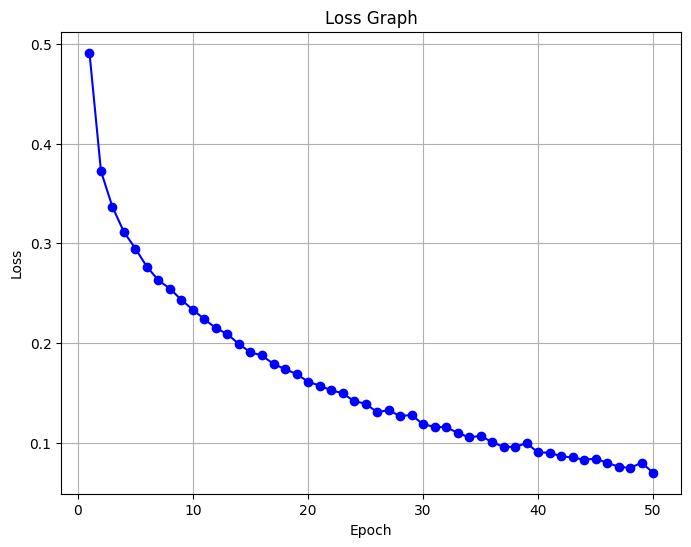

Total execution time: 908.36 seconds


In [ ]:
import torch  # ACTIVATION FUNCTION testing using ReLU, fixing all other aspects to default
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
overall_start_time = time.time()

model = nn.Sequential(
    nn.Linear(784, 196),  # Input layer starting with number of pixels
    nn.ReLU(),           # ReLU Activation
    nn.Linear(196, 49),  # Hidden layer 1
    nn.ReLU(),           # ReLU Activation again
    nn.Linear(49, 10),   # Hidden layer 2

)

for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        if layer.bias is not None:
            init.zeros_(layer.bias)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
loss_fn = nn.CrossEntropyLoss() # loss function

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)  # Calculate the average training loss
    loss_values.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs} \t\t Training Loss: {avg_train_loss:.6f}')

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # average loss

plt.figure(figsize=(8, 6))        # start plotting
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

end_time = time.time()
overall_time = end_time - overall_start_time
print(f"Total execution time: {overall_time:.2f} seconds")


Epoch 1/50 		 Training Loss: 0.623159
Epoch 2/50 		 Training Loss: 0.396762
Epoch 3/50 		 Training Loss: 0.352551
Epoch 4/50 		 Training Loss: 0.322918
Epoch 5/50 		 Training Loss: 0.303704
Epoch 6/50 		 Training Loss: 0.287201
Epoch 7/50 		 Training Loss: 0.272715
Epoch 8/50 		 Training Loss: 0.258582
Epoch 9/50 		 Training Loss: 0.250206
Epoch 10/50 		 Training Loss: 0.237603
Epoch 11/50 		 Training Loss: 0.227341
Epoch 12/50 		 Training Loss: 0.218387
Epoch 13/50 		 Training Loss: 0.210624
Epoch 14/50 		 Training Loss: 0.199665
Epoch 15/50 		 Training Loss: 0.195412
Epoch 16/50 		 Training Loss: 0.186863
Epoch 17/50 		 Training Loss: 0.179738
Epoch 18/50 		 Training Loss: 0.170803
Epoch 19/50 		 Training Loss: 0.165805
Epoch 20/50 		 Training Loss: 0.160489
Epoch 21/50 		 Training Loss: 0.154385
Epoch 22/50 		 Training Loss: 0.147301
Epoch 23/50 		 Training Loss: 0.142705
Epoch 24/50 		 Training Loss: 0.137471
Epoch 25/50 		 Training Loss: 0.132235
Epoch 26/50 		 Training Loss: 0.12

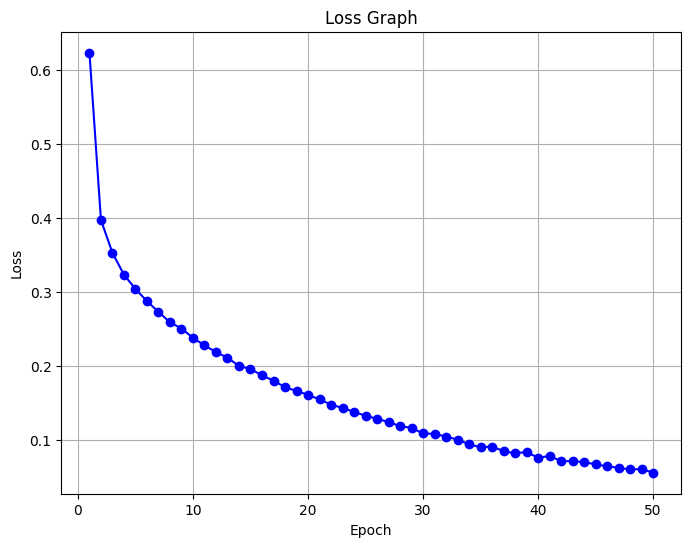

Total execution time: 886.70 seconds


In [ ]:
import torch  # ACTIVATION FUNCTION testing using the sigmoid funciton, fixing all other aspects to default
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
overall_start_time = time.time()

model = nn.Sequential(
    nn.Linear(784, 196),  # Input layer starting with number of pixels
    nn.Sigmoid(),          # sigmoid Activation
    nn.Linear(196, 49),  # Hidden layer 1
    nn.Sigmoid(),          # sigmoid Activation again
    nn.Linear(49, 10),   # Hidden layer 2

)

for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        if layer.bias is not None:
            init.zeros_(layer.bias)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
loss_fn = nn.CrossEntropyLoss() # loss function

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)  # Calculate the average training loss
    loss_values.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs} \t\t Training Loss: {avg_train_loss:.6f}')

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # average loss

plt.figure(figsize=(8, 6))        # start plotting
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

end_time = time.time()
overall_time = end_time - overall_start_time
print(f"Total execution time: {overall_time:.2f} seconds")


Epoch 1/50 		 Training Loss: 0.489344
Epoch 2/50 		 Training Loss: 0.374198
Epoch 3/50 		 Training Loss: 0.342553
Epoch 4/50 		 Training Loss: 0.327203
Epoch 5/50 		 Training Loss: 0.310987
Epoch 6/50 		 Training Loss: 0.303543
Epoch 7/50 		 Training Loss: 0.289979
Epoch 8/50 		 Training Loss: 0.279218
Epoch 9/50 		 Training Loss: 0.274207
Epoch 10/50 		 Training Loss: 0.268549
Epoch 11/50 		 Training Loss: 0.261003
Epoch 12/50 		 Training Loss: 0.255821
Epoch 13/50 		 Training Loss: 0.244163
Epoch 14/50 		 Training Loss: 0.241616
Epoch 15/50 		 Training Loss: 0.234600
Epoch 16/50 		 Training Loss: 0.229219
Epoch 17/50 		 Training Loss: 0.223256
Epoch 18/50 		 Training Loss: 0.221670
Epoch 19/50 		 Training Loss: 0.211989
Epoch 20/50 		 Training Loss: 0.209460
Epoch 21/50 		 Training Loss: 0.203153
Epoch 22/50 		 Training Loss: 0.201925
Epoch 23/50 		 Training Loss: 0.197228
Epoch 24/50 		 Training Loss: 0.194760
Epoch 25/50 		 Training Loss: 0.190140
Epoch 26/50 		 Training Loss: 0.18

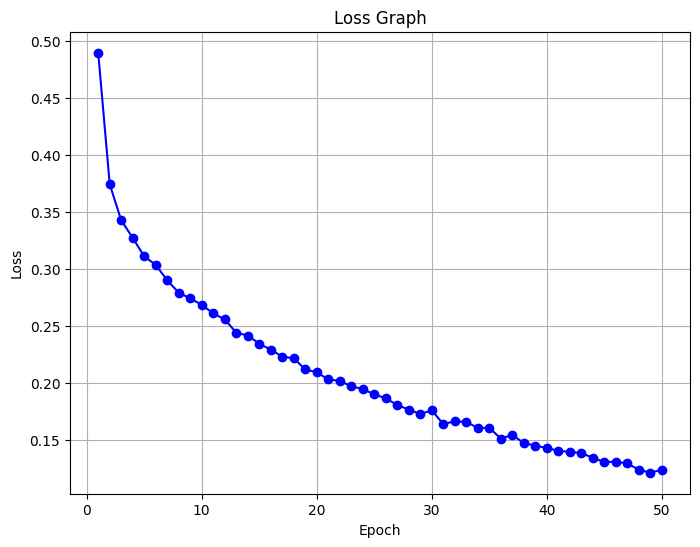

Total execution time: 885.05 seconds


In [ ]:
import torch  # ACTIVATION FUNCTION testing using the Tanh funciton, fixing all other aspects to default
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
overall_start_time = time.time()

model = nn.Sequential(
    nn.Linear(784, 196),  # Input layer starting with number of pixels
    nn.Tanh(),          # tanh Activation
    nn.Linear(196, 49),  # Hidden layer 1
    nn.Tanh(),          # tanh Activation again
    nn.Linear(49, 10),   # Hidden layer 2

)

for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        if layer.bias is not None:
            init.zeros_(layer.bias)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
loss_fn = nn.CrossEntropyLoss() # loss function

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)  # Calculate the average training loss
    loss_values.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs} \t\t Training Loss: {avg_train_loss:.6f}')

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # average loss

plt.figure(figsize=(8, 6))        # start plotting
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

end_time = time.time()
overall_time = end_time - overall_start_time
print(f"Total execution time: {overall_time:.2f} seconds")


Epoch 1/50 		 Training Loss: 0.486430
Epoch 2/50 		 Training Loss: 0.372871
Epoch 3/50 		 Training Loss: 0.334890
Epoch 4/50 		 Training Loss: 0.313318
Epoch 5/50 		 Training Loss: 0.296438
Epoch 6/50 		 Training Loss: 0.278528
Epoch 7/50 		 Training Loss: 0.267184
Epoch 8/50 		 Training Loss: 0.252480
Epoch 9/50 		 Training Loss: 0.243217
Epoch 10/50 		 Training Loss: 0.233004
Epoch 11/50 		 Training Loss: 0.226090
Epoch 12/50 		 Training Loss: 0.217958
Epoch 13/50 		 Training Loss: 0.210301
Epoch 14/50 		 Training Loss: 0.201226
Epoch 15/50 		 Training Loss: 0.193952
Epoch 16/50 		 Training Loss: 0.189236
Epoch 17/50 		 Training Loss: 0.178933
Epoch 18/50 		 Training Loss: 0.173359
Epoch 19/50 		 Training Loss: 0.169976
Epoch 20/50 		 Training Loss: 0.164831
Epoch 21/50 		 Training Loss: 0.157632
Epoch 22/50 		 Training Loss: 0.156691
Epoch 23/50 		 Training Loss: 0.145726
Epoch 24/50 		 Training Loss: 0.143349
Epoch 25/50 		 Training Loss: 0.137836
Epoch 26/50 		 Training Loss: 0.13

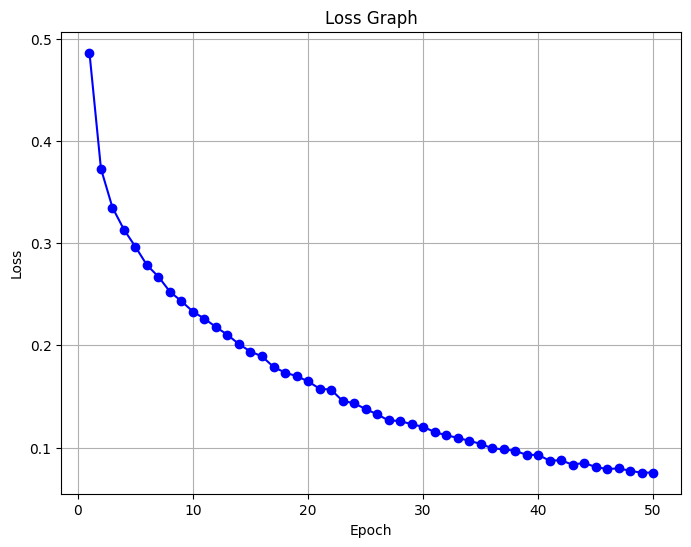

Total execution time: 880.00 seconds


In [ ]:
import torch  # ACTIVATION FUNCTION testing using the leaky ReLU funciton, fixing all other aspects to default
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
overall_start_time = time.time()

model = nn.Sequential(
    nn.Linear(784, 196),  # Input layer starting with number of pixels
    nn.LeakyReLU(),          # leaky relu Activation
    nn.Linear(196, 49),  # Hidden layer 1
    nn.LeakyReLU(),          # leaky relu Activation again
    nn.Linear(49, 10),   # Hidden layer 2

)

for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        if layer.bias is not None:
            init.zeros_(layer.bias)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
loss_fn = nn.CrossEntropyLoss() # loss function

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)  # Calculate the average training loss
    loss_values.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs} \t\t Training Loss: {avg_train_loss:.6f}')

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # average loss

plt.figure(figsize=(8, 6))        # start plotting
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

end_time = time.time()
overall_time = end_time - overall_start_time
print(f"Total execution time: {overall_time:.2f} seconds")


after testing activation functions, we can rank them based on loss as follows:
least loss value: sigmoid activation: 0.0552
- ReLU: 0.0700
- leaky ReLU: 0.0756
- highest loss value: tanh: 0.1242
- the previous test showed that the best choice was sigmoid activation, and ReLU came in the second place, to fix one of them, well test both for the learning rates and watch their behaviour, then fix one of them for the next step
the next parameter that will be tested will be the learning rate, the learning rates tested will be:
-default (0.001 lr) which is already tested
- 0.0001 lr
- 0.01 lr
-first, sigmoid with **0.0001** and **0.01**

Epoch 1/50 		 Training Loss: 1.357750
Epoch 2/50 		 Training Loss: 0.764527
Epoch 3/50 		 Training Loss: 0.603403
Epoch 4/50 		 Training Loss: 0.526284
Epoch 5/50 		 Training Loss: 0.482179
Epoch 6/50 		 Training Loss: 0.452608
Epoch 7/50 		 Training Loss: 0.431605
Epoch 8/50 		 Training Loss: 0.414913
Epoch 9/50 		 Training Loss: 0.401807
Epoch 10/50 		 Training Loss: 0.390342
Epoch 11/50 		 Training Loss: 0.380848
Epoch 12/50 		 Training Loss: 0.371898
Epoch 13/50 		 Training Loss: 0.364814
Epoch 14/50 		 Training Loss: 0.357774
Epoch 15/50 		 Training Loss: 0.351222
Epoch 16/50 		 Training Loss: 0.345146
Epoch 17/50 		 Training Loss: 0.339950
Epoch 18/50 		 Training Loss: 0.334707
Epoch 19/50 		 Training Loss: 0.329543
Epoch 20/50 		 Training Loss: 0.325263
Epoch 21/50 		 Training Loss: 0.320493
Epoch 22/50 		 Training Loss: 0.316247
Epoch 23/50 		 Training Loss: 0.312365
Epoch 24/50 		 Training Loss: 0.308048
Epoch 25/50 		 Training Loss: 0.304240
Epoch 26/50 		 Training Loss: 0.30

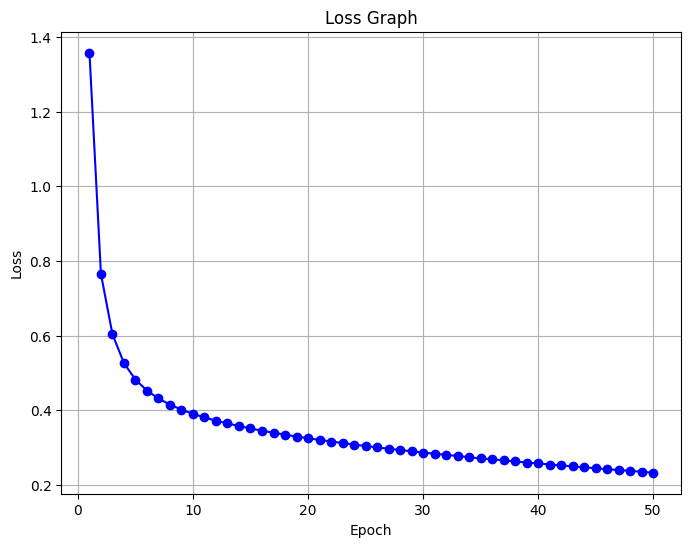

Total execution time: 883.79 seconds


In [ ]:
import torch  # ACTIVATION FUNCTION testing using the sigmoid funciton, and learning rate of 0.0001
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
overall_start_time = time.time()

model = nn.Sequential(
    nn.Linear(784, 196),  # Input layer starting with number of pixels
    nn.Sigmoid(),          # sigmoid Activation
    nn.Linear(196, 49),  # Hidden layer 1
    nn.Sigmoid(),          # sigmoid Activation again
    nn.Linear(49, 10),   # Hidden layer 2

)

for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        if layer.bias is not None:
            init.zeros_(layer.bias)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Adam optimization (0.0001 learning rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
loss_fn = nn.CrossEntropyLoss() # loss function

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)  # Calculate the average training loss
    loss_values.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs} \t\t Training Loss: {avg_train_loss:.6f}')

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # average loss

plt.figure(figsize=(8, 6))        # start plotting
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

end_time = time.time()
overall_time = end_time - overall_start_time
print(f"Total execution time: {overall_time:.2f} seconds")


Epoch 1/50 		 Training Loss: 0.610542
Epoch 2/50 		 Training Loss: 0.518105
Epoch 3/50 		 Training Loss: 0.491139
Epoch 4/50 		 Training Loss: 0.481820
Epoch 5/50 		 Training Loss: 0.469529
Epoch 6/50 		 Training Loss: 0.461296
Epoch 7/50 		 Training Loss: 0.460112
Epoch 8/50 		 Training Loss: 0.445243
Epoch 9/50 		 Training Loss: 0.455644
Epoch 10/50 		 Training Loss: 0.446742
Epoch 11/50 		 Training Loss: 0.441687
Epoch 12/50 		 Training Loss: 0.444206
Epoch 13/50 		 Training Loss: 0.445777
Epoch 14/50 		 Training Loss: 0.448170
Epoch 15/50 		 Training Loss: 0.430399
Epoch 16/50 		 Training Loss: 0.427066
Epoch 17/50 		 Training Loss: 0.428164
Epoch 18/50 		 Training Loss: 0.429806
Epoch 19/50 		 Training Loss: 0.418735
Epoch 20/50 		 Training Loss: 0.420601
Epoch 21/50 		 Training Loss: 0.426985
Epoch 22/50 		 Training Loss: 0.427167
Epoch 23/50 		 Training Loss: 0.420748
Epoch 24/50 		 Training Loss: 0.419190
Epoch 25/50 		 Training Loss: 0.416064
Epoch 26/50 		 Training Loss: 0.41

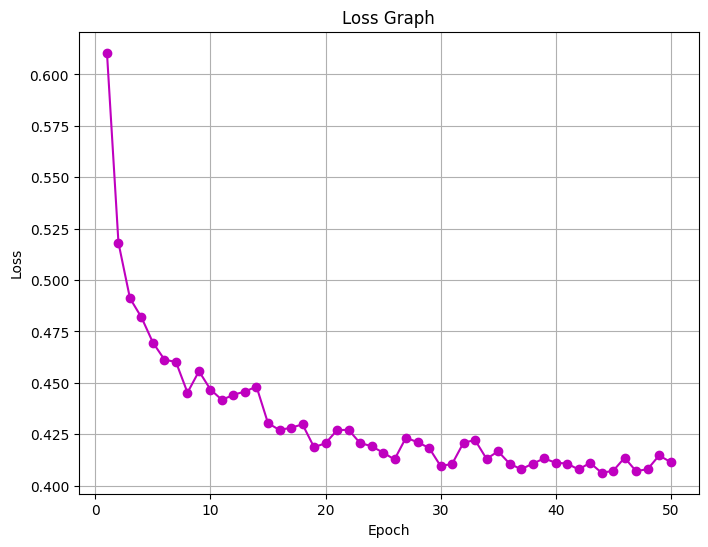

Total execution time: 987.29 seconds


In [ ]:
import torch  # ACTIVATION FUNCTION testing using the sigmoid funciton, and learning rate of 0.01
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
overall_start_time = time.time()

model = nn.Sequential(
    nn.Linear(784, 196),  # Input layer starting with number of pixels
    nn.Sigmoid(),          # sigmoid Activation
    nn.Linear(196, 49),  # Hidden layer 1
    nn.Sigmoid(),          # sigmoid Activation again
    nn.Linear(49, 10),   # Hidden layer 2

)

for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        if layer.bias is not None:
            init.zeros_(layer.bias)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Adam optimization (0.0001 learning rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
loss_fn = nn.CrossEntropyLoss() # loss function

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)  # Calculate the average training loss
    loss_values.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs} \t\t Training Loss: {avg_train_loss:.6f}')

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # average loss

plt.figure(figsize=(8, 6))        # start plotting
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='m')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

end_time = time.time()
overall_time = end_time - overall_start_time
print(f"Total execution time: {overall_time:.2f} seconds")


- Next, trying ReLU with **0.0001** and then **0.01** **learning** **rate**

Epoch 1/50 		 Training Loss: 0.613651
Epoch 2/50 		 Training Loss: 0.420630
Epoch 3/50 		 Training Loss: 0.378545
Epoch 4/50 		 Training Loss: 0.352966
Epoch 5/50 		 Training Loss: 0.333582
Epoch 6/50 		 Training Loss: 0.318511
Epoch 7/50 		 Training Loss: 0.305931
Epoch 8/50 		 Training Loss: 0.295367
Epoch 9/50 		 Training Loss: 0.284473
Epoch 10/50 		 Training Loss: 0.275701
Epoch 11/50 		 Training Loss: 0.268150
Epoch 12/50 		 Training Loss: 0.260276
Epoch 13/50 		 Training Loss: 0.253808
Epoch 14/50 		 Training Loss: 0.247806
Epoch 15/50 		 Training Loss: 0.240589
Epoch 16/50 		 Training Loss: 0.235360
Epoch 17/50 		 Training Loss: 0.230745
Epoch 18/50 		 Training Loss: 0.225381
Epoch 19/50 		 Training Loss: 0.220176
Epoch 20/50 		 Training Loss: 0.215123
Epoch 21/50 		 Training Loss: 0.210319
Epoch 22/50 		 Training Loss: 0.204473
Epoch 23/50 		 Training Loss: 0.201269
Epoch 24/50 		 Training Loss: 0.197964
Epoch 25/50 		 Training Loss: 0.192583
Epoch 26/50 		 Training Loss: 0.18

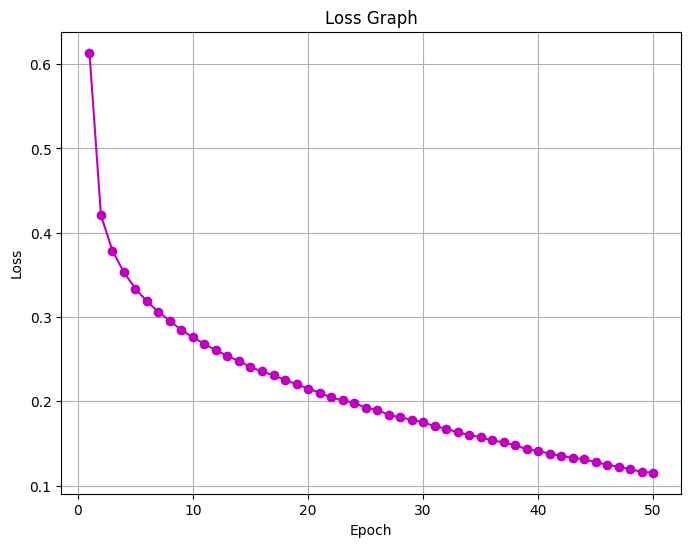

Total execution time: 880.78 seconds


In [ ]:
import torch  # ACTIVATION FUNCTION testing using ReLU, and learning rate of 0.0001
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
overall_start_time = time.time()

model = nn.Sequential(
    nn.Linear(784, 196),  # Input layer starting with number of pixels
    nn.ReLU(),           # ReLU Activation
    nn.Linear(196, 49),  # Hidden layer 1
    nn.ReLU(),           # ReLU Activation again
    nn.Linear(49, 10),   # Hidden layer 2

)

for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        if layer.bias is not None:
            init.zeros_(layer.bias)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Adam optimization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
loss_fn = nn.CrossEntropyLoss() # loss function

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)  # Calculate the average training loss
    loss_values.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs} \t\t Training Loss: {avg_train_loss:.6f}')

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # average loss

plt.figure(figsize=(8, 6))        # start plotting
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='m')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

end_time = time.time()
overall_time = end_time - overall_start_time
print(f"Total execution time: {overall_time:.2f} seconds")


Epoch 1/50 		 Training Loss: 0.565660
Epoch 2/50 		 Training Loss: 0.442644
Epoch 3/50 		 Training Loss: 0.411351
Epoch 4/50 		 Training Loss: 0.404930
Epoch 5/50 		 Training Loss: 0.391816
Epoch 6/50 		 Training Loss: 0.384859
Epoch 7/50 		 Training Loss: 0.375026
Epoch 8/50 		 Training Loss: 0.378583
Epoch 9/50 		 Training Loss: 0.366482
Epoch 10/50 		 Training Loss: 0.363885
Epoch 11/50 		 Training Loss: 0.353679
Epoch 12/50 		 Training Loss: 0.353171
Epoch 13/50 		 Training Loss: 0.344180
Epoch 14/50 		 Training Loss: 0.356926
Epoch 15/50 		 Training Loss: 0.343681
Epoch 16/50 		 Training Loss: 0.338881
Epoch 17/50 		 Training Loss: 0.335849
Epoch 18/50 		 Training Loss: 0.342563
Epoch 19/50 		 Training Loss: 0.336395
Epoch 20/50 		 Training Loss: 0.332542
Epoch 21/50 		 Training Loss: 0.334098
Epoch 22/50 		 Training Loss: 0.327308
Epoch 23/50 		 Training Loss: 0.333985
Epoch 24/50 		 Training Loss: 0.321507
Epoch 25/50 		 Training Loss: 0.318541
Epoch 26/50 		 Training Loss: 0.31

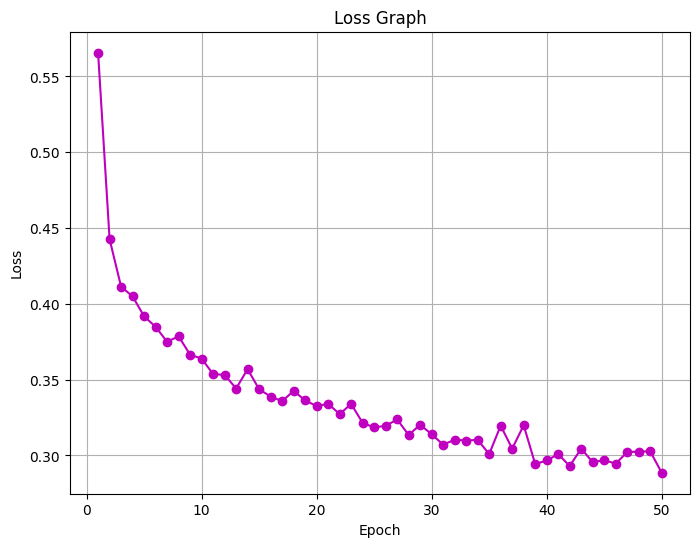

Total execution time: 956.67 seconds


In [ ]:
import torch  # ACTIVATION FUNCTION testing using ReLU, and learning rate of 0.01
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
overall_start_time = time.time()

model = nn.Sequential(
    nn.Linear(784, 196),  # Input layer starting with number of pixels
    nn.ReLU(),           # ReLU Activation
    nn.Linear(196, 49),  # Hidden layer 1
    nn.ReLU(),           # ReLU Activation again
    nn.Linear(49, 10),   # Hidden layer 2

)

for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        if layer.bias is not None:
            init.zeros_(layer.bias)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Adam optimization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
loss_fn = nn.CrossEntropyLoss() # loss function

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)  # Calculate the average training loss
    loss_values.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs} \t\t Training Loss: {avg_train_loss:.6f}')

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # average loss

plt.figure(figsize=(8, 6))        # start plotting
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='m')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

end_time = time.time()
overall_time = end_time - overall_start_time
print(f"Total execution time: {overall_time:.2f} seconds")


after trying different learning rates with sigmoid and ReLU activation, the results were:
- for sigmoid activation:
  - 0.0001 learning rate: Loss: 0.2327
  - 0.001 learning rate: Loss: 0.0552
  - 0.01 learning rate: Loss: 0.4115
- for ReLU activation:
  - 0.0001 learning rate: Loss: 0.1152
  - 0.001 learning rate: Loss: 0.0700
  - 0.01 learning rate: Loss: 0.2886

  in both cases, the results indicate that 0.001 is the best learning rate choice, thus, for the next step, the learning rate will be fixed to 0.001, and the next variable will be tested for both sigmoid and relu too.

  the next parameter is the step size:
  - 20 steps
  - 30 steps (already tried)
  - 40 steps
  with both relu and sigmoid

Epoch 1/50 		 Training Loss: 0.624846
Epoch 2/50 		 Training Loss: 0.395035
Epoch 3/50 		 Training Loss: 0.354259
Epoch 4/50 		 Training Loss: 0.324547
Epoch 5/50 		 Training Loss: 0.305715
Epoch 6/50 		 Training Loss: 0.288480
Epoch 7/50 		 Training Loss: 0.274742
Epoch 8/50 		 Training Loss: 0.261527
Epoch 9/50 		 Training Loss: 0.250387
Epoch 10/50 		 Training Loss: 0.238394
Epoch 11/50 		 Training Loss: 0.228370
Epoch 12/50 		 Training Loss: 0.218225
Epoch 13/50 		 Training Loss: 0.211006
Epoch 14/50 		 Training Loss: 0.203128
Epoch 15/50 		 Training Loss: 0.194166
Epoch 16/50 		 Training Loss: 0.188384
Epoch 17/50 		 Training Loss: 0.180789
Epoch 18/50 		 Training Loss: 0.174063
Epoch 19/50 		 Training Loss: 0.167953
Epoch 20/50 		 Training Loss: 0.160659
Epoch 21/50 		 Training Loss: 0.155177
Epoch 22/50 		 Training Loss: 0.150414
Epoch 23/50 		 Training Loss: 0.146337
Epoch 24/50 		 Training Loss: 0.138728
Epoch 25/50 		 Training Loss: 0.135017
Epoch 26/50 		 Training Loss: 0.12

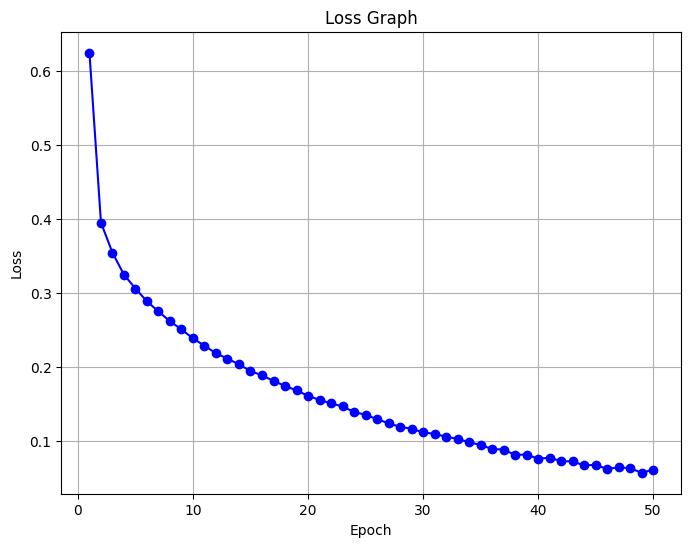

Total execution time: 894.34 seconds


In [ ]:
import torch  # ACTIVATION FUNCTION testing using the sigmoid funciton, learning rate of 0.001, step size: 20
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
overall_start_time = time.time()

model = nn.Sequential(
    nn.Linear(784, 196),  # Input layer starting with number of pixels
    nn.Sigmoid(),          # sigmoid Activation
    nn.Linear(196, 49),  # Hidden layer 1
    nn.Sigmoid(),          # sigmoid Activation again
    nn.Linear(49, 10),   # Hidden layer 2

)

for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        if layer.bias is not None:
            init.zeros_(layer.bias)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
loss_fn = nn.CrossEntropyLoss() # loss function

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)  # Calculate the average training loss
    loss_values.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs} \t\t Training Loss: {avg_train_loss:.6f}')

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # average loss

plt.figure(figsize=(8, 6))        # start plotting
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

end_time = time.time()
overall_time = end_time - overall_start_time
print(f"Total execution time: {overall_time:.2f} seconds")


Epoch 1/50 		 Training Loss: 0.621799
Epoch 2/50 		 Training Loss: 0.398737
Epoch 3/50 		 Training Loss: 0.354447
Epoch 4/50 		 Training Loss: 0.324915
Epoch 5/50 		 Training Loss: 0.306455
Epoch 6/50 		 Training Loss: 0.288312
Epoch 7/50 		 Training Loss: 0.275030
Epoch 8/50 		 Training Loss: 0.260451
Epoch 9/50 		 Training Loss: 0.248187
Epoch 10/50 		 Training Loss: 0.238856
Epoch 11/50 		 Training Loss: 0.228516
Epoch 12/50 		 Training Loss: 0.218785
Epoch 13/50 		 Training Loss: 0.211756
Epoch 14/50 		 Training Loss: 0.199807
Epoch 15/50 		 Training Loss: 0.194293
Epoch 16/50 		 Training Loss: 0.185550
Epoch 17/50 		 Training Loss: 0.179705
Epoch 18/50 		 Training Loss: 0.172099
Epoch 19/50 		 Training Loss: 0.165836
Epoch 20/50 		 Training Loss: 0.158619
Epoch 21/50 		 Training Loss: 0.154102
Epoch 22/50 		 Training Loss: 0.151386
Epoch 23/50 		 Training Loss: 0.139317
Epoch 24/50 		 Training Loss: 0.137678
Epoch 25/50 		 Training Loss: 0.129708
Epoch 26/50 		 Training Loss: 0.12

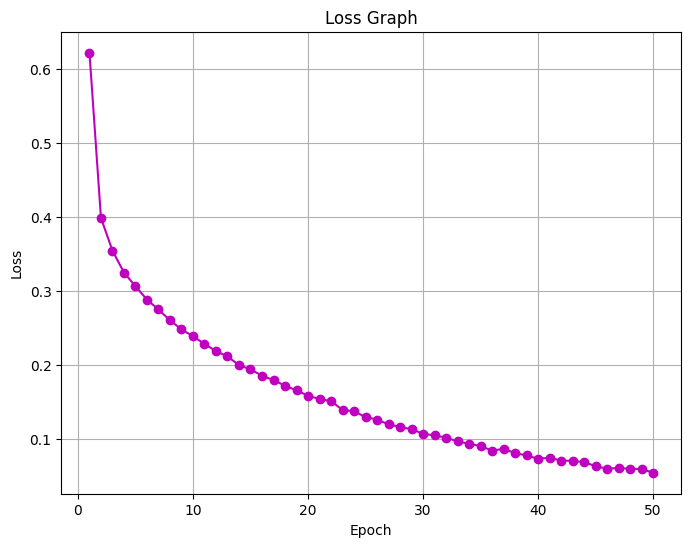

Total execution time: 887.69 seconds


In [ ]:
import torch  # ACTIVATION FUNCTION testing using the sigmoid funciton, learning rate of 0.001, step size: 40
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
overall_start_time = time.time()

model = nn.Sequential(
    nn.Linear(784, 196),  # Input layer starting with number of pixels
    nn.Sigmoid(),          # sigmoid Activation
    nn.Linear(196, 49),  # Hidden layer 1
    nn.Sigmoid(),          # sigmoid Activation again
    nn.Linear(49, 10),   # Hidden layer 2

)

for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        if layer.bias is not None:
            init.zeros_(layer.bias)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)
loss_fn = nn.CrossEntropyLoss() # loss function

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)  # Calculate the average training loss
    loss_values.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs} \t\t Training Loss: {avg_train_loss:.6f}')

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # average loss

plt.figure(figsize=(8, 6))        # start plotting
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='m')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

end_time = time.time()
overall_time = end_time - overall_start_time
print(f"Total execution time: {overall_time:.2f} seconds")


now, using relu

Epoch 1/50 		 Training Loss: 0.502953
Epoch 2/50 		 Training Loss: 0.376967
Epoch 3/50 		 Training Loss: 0.338297
Epoch 4/50 		 Training Loss: 0.313946
Epoch 5/50 		 Training Loss: 0.295125
Epoch 6/50 		 Training Loss: 0.278507
Epoch 7/50 		 Training Loss: 0.267188
Epoch 8/50 		 Training Loss: 0.255041
Epoch 9/50 		 Training Loss: 0.243122
Epoch 10/50 		 Training Loss: 0.235292
Epoch 11/50 		 Training Loss: 0.225255
Epoch 12/50 		 Training Loss: 0.217930
Epoch 13/50 		 Training Loss: 0.210366
Epoch 14/50 		 Training Loss: 0.203205
Epoch 15/50 		 Training Loss: 0.195100
Epoch 16/50 		 Training Loss: 0.186156
Epoch 17/50 		 Training Loss: 0.183763
Epoch 18/50 		 Training Loss: 0.177529
Epoch 19/50 		 Training Loss: 0.171234
Epoch 20/50 		 Training Loss: 0.165097
Epoch 21/50 		 Training Loss: 0.157698
Epoch 22/50 		 Training Loss: 0.154955
Epoch 23/50 		 Training Loss: 0.150335
Epoch 24/50 		 Training Loss: 0.145079
Epoch 25/50 		 Training Loss: 0.141442
Epoch 26/50 		 Training Loss: 0.13

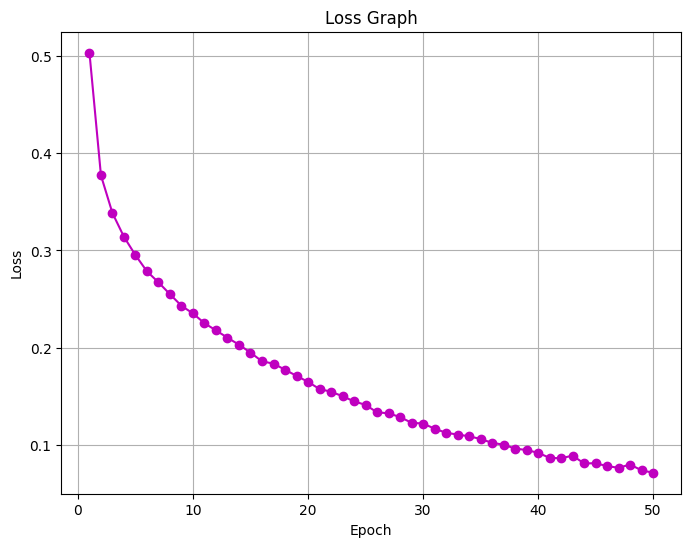

Total execution time: 907.50 seconds


In [ ]:
import torch  # ACTIVATION FUNCTION testing using ReLU, learning rate of 0.001, step size: 20
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
overall_start_time = time.time()

model = nn.Sequential(
    nn.Linear(784, 196),  # Input layer starting with number of pixels
    nn.ReLU(),           # ReLU Activation
    nn.Linear(196, 49),  # Hidden layer 1
    nn.ReLU(),           # ReLU Activation again
    nn.Linear(49, 10),   # Hidden layer 2

)

for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        if layer.bias is not None:
            init.zeros_(layer.bias)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
loss_fn = nn.CrossEntropyLoss() # loss function

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)  # Calculate the average training loss
    loss_values.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs} \t\t Training Loss: {avg_train_loss:.6f}')

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # average loss

plt.figure(figsize=(8, 6))        # start plotting
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='m')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

end_time = time.time()
overall_time = end_time - overall_start_time
print(f"Total execution time: {overall_time:.2f} seconds")


Epoch 1/50 		 Training Loss: 0.490487
Epoch 2/50 		 Training Loss: 0.369046
Epoch 3/50 		 Training Loss: 0.335290
Epoch 4/50 		 Training Loss: 0.308926
Epoch 5/50 		 Training Loss: 0.291855
Epoch 6/50 		 Training Loss: 0.274969
Epoch 7/50 		 Training Loss: 0.261088
Epoch 8/50 		 Training Loss: 0.251757
Epoch 9/50 		 Training Loss: 0.240315
Epoch 10/50 		 Training Loss: 0.231177
Epoch 11/50 		 Training Loss: 0.222751
Epoch 12/50 		 Training Loss: 0.216312
Epoch 13/50 		 Training Loss: 0.207882
Epoch 14/50 		 Training Loss: 0.200015
Epoch 15/50 		 Training Loss: 0.189574
Epoch 16/50 		 Training Loss: 0.188588
Epoch 17/50 		 Training Loss: 0.181458
Epoch 18/50 		 Training Loss: 0.172322
Epoch 19/50 		 Training Loss: 0.167459
Epoch 20/50 		 Training Loss: 0.164912
Epoch 21/50 		 Training Loss: 0.159565
Epoch 22/50 		 Training Loss: 0.153575
Epoch 23/50 		 Training Loss: 0.147082
Epoch 24/50 		 Training Loss: 0.144515
Epoch 25/50 		 Training Loss: 0.139185
Epoch 26/50 		 Training Loss: 0.13

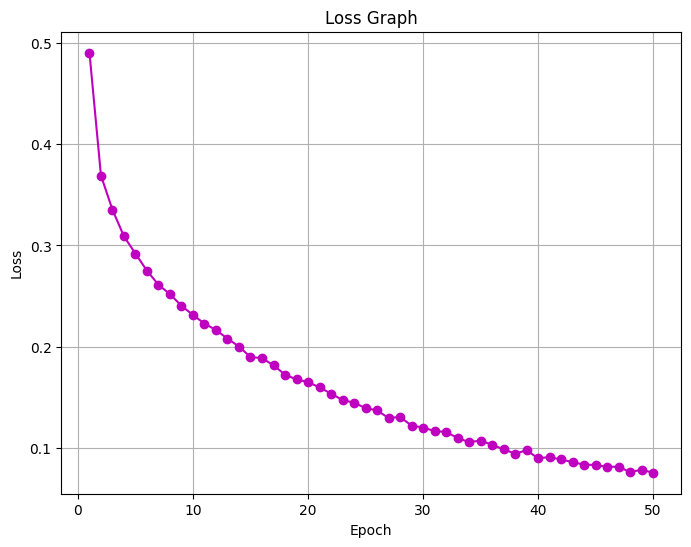

Total execution time: 905.97 seconds


In [ ]:
import torch  # ACTIVATION FUNCTION testing using ReLU, learning rate of 0.001, step size: 40
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
overall_start_time = time.time()

model = nn.Sequential(
    nn.Linear(784, 196),  # Input layer starting with number of pixels
    nn.ReLU(),           # ReLU Activation
    nn.Linear(196, 49),  # Hidden layer 1
    nn.ReLU(),           # ReLU Activation again
    nn.Linear(49, 10),   # Hidden layer 2

)

for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        if layer.bias is not None:
            init.zeros_(layer.bias)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)
loss_fn = nn.CrossEntropyLoss() # loss function

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)  # Calculate the average training loss
    loss_values.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs} \t\t Training Loss: {avg_train_loss:.6f}')

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # average loss

plt.figure(figsize=(8, 6))        # start plotting
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='m')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

end_time = time.time()
overall_time = end_time - overall_start_time
print(f"Total execution time: {overall_time:.2f} seconds")


the results optained were:
- for sigmoid:
    - 20 steps: Loss: 0.0607
    - 30 steps: Loss: 0.0552
    - 40 steps: Loss: 0.0546
- for ReLU:
    - 20 steps: Loss: 0.0718
    - 30 steps: Loss: 0.0700
    - 40 steps: Loss: 0.0753

based on all the results collected from the start and to the end, the model that showed the least loss value included:

*   sgmoid activationem
*   0.001 learning rate
*   40 step size

